In [1]:
#impoting all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data.csv',encoding='ISO-8859-1')#reading data

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.duplicated().sum()

6

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(15503, 10)

In [9]:
df.isnull().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [10]:
df.dropna(inplace=True) #droping null values

In [11]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [12]:

df.shape

(5659, 10)

In [13]:
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))

In [14]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [15]:
df.dtypes

Name         object
Year          int32
Duration      int64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [16]:
df = df.convert_dtypes()

In [17]:
df.dtypes

Name        string[python]
Year                 Int32
Duration             Int64
Genre       string[python]
Rating             Float64
Votes       string[python]
Director    string[python]
Actor 1     string[python]
Actor 2     string[python]
Actor 3     string[python]
dtype: object

In [18]:
df.describe()

,Year,Duration,Rating
count,5659.0,5659.0,5659.0
mean,1996.24757,133.439124,5.898533
std,19.741839,25.319939,1.381165
min,1931.0,21.0,1.1
25%,1983.0,119.0,5.0
50%,2002.0,135.0,6.1
75%,2013.0,150.0,6.9
max,2021.0,321.0,10.0


In [19]:
df.Genre.unique()

<StringArray>
[                          'Drama',                 'Comedy, Romance',
          'Comedy, Drama, Musical',             'Drama, Romance, War',
       'Horror, Mystery, Thriller',         'Action, Crime, Thriller',
                          'Horror',       'Horror, Romance, Thriller',
          'Comedy, Drama, Romance',                   'Comedy, Drama',
 ...
          'Crime, Horror, Romance',        'Fantasy, Horror, Romance',
        'Comedy, Fantasy, Musical',        'Animation, Action, Drama',
        'Crime, Musical, Thriller',             'Action, Comedy, War',
                 'Mystery, Sci-Fi',         'Horror, Romance, Sci-Fi',
         'Romance, Musical, Drama', 'Documentary, Biography, Musical']
Length: 376, dtype: string

In [20]:
# top 10 high rated movies

In [21]:
highest_rating = df[df['Rating']>9].head(10)
hr_movies_names = highest_rating['Name']
hr_movies_rating = highest_rating["Rating"]


In [22]:
data = {
    "Movie Name": hr_movies_names,
    "Rating": hr_movies_rating
}
print('Top 10 movies of all time')
pd.DataFrame(data)

Top 10 movies of all time


,Movie Name,Rating
1314,Ashok Vatika,9.3
1729,Baikunth,9.3
5077,Gho Gho Rani,9.4
5125,God of gods,9.3
5410,Half Songs,9.7
6025,I'm in Love,9.2
6852,June,9.4
6952,Kaadan,9.1
8339,Love Qubool Hai,10.0
8344,Love Sorries,9.3


In [23]:
top_10_directors = df.Director.value_counts().head(10)
y = top_10_directors.values
x = top_10_directors.index


Text(0.5, 1.0, 'Top 10 directors')

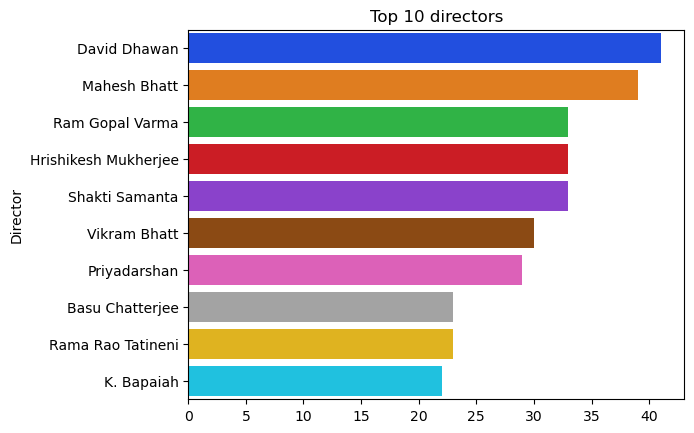

In [24]:
# sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')
sns.barplot(
    x=top_10_directors.values,
    y=top_10_directors.index,
    hue=top_10_directors.index,  # Use `y` as `hue`
    palette="bright",
    dodge=False  # Avoid separating bars by hue
    
)
plt.title("Top 10 directors")


Text(0.5, 1.0, 'Rating distribution')

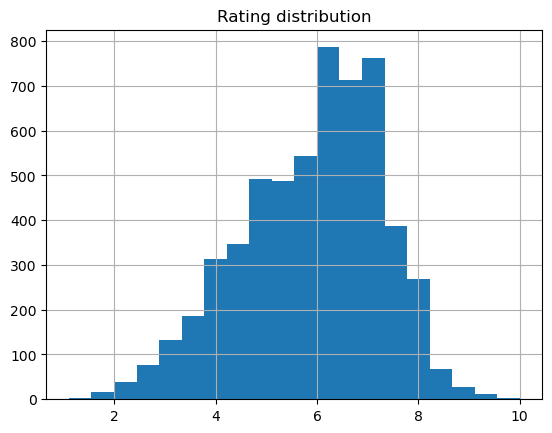

In [25]:
df['Rating'].hist(bins=20)
plt.title("Rating distribution")

In [26]:
df['Rating'].mode()

0    6.8
Name: Rating, dtype: Float64

Text(0.5, 1.0, 'Top 10 Genre')

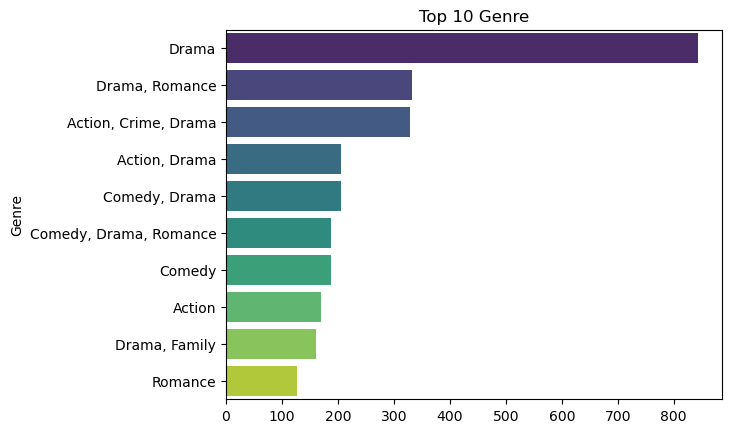

In [27]:
top_10_genre =  df.Genre.value_counts().head(10)

sns.barplot(
    x=top_10_genre.values, 
    y=top_10_genre.index, 
    palette="viridis",
    hue = top_10_genre.index# Choose a palette
)
plt.title("Top 10 Genre")

In [28]:
combined_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
top_10_actors = combined_actors.value_counts().head(10)
top_10_actors


Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
Name: count, dtype: Int64

Text(0, 0.5, 'Actors Name')

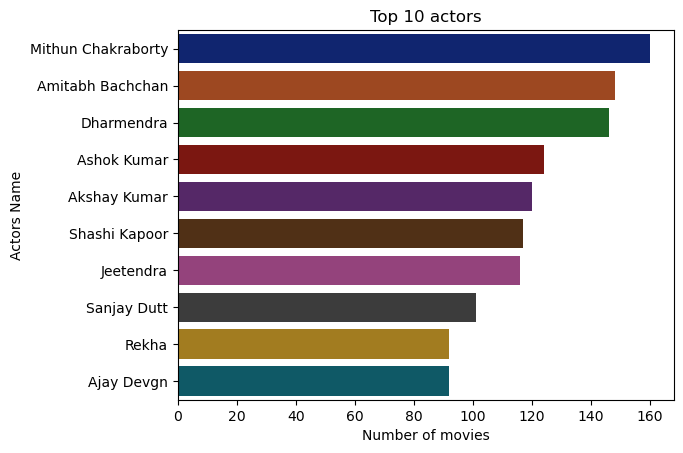

In [29]:
sns.barplot(
    x=top_10_actors.values, 
    y=top_10_actors.index, 
    palette="dark",
    hue = top_10_actors.index# Choose a palette
)
plt.title('Top 10 actors')
plt.xlabel('Number of movies')
plt.ylabel("Actors Name")

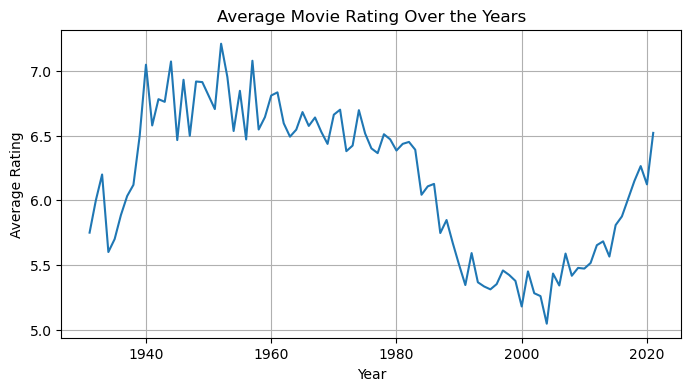

In [30]:
average_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']

plt.figure(figsize=(8, 4))
plt.plot(average_rating_per_year['Year'], average_rating_per_year['Average Rating'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(True)
plt.show()

## trying with lable encoding



In [31]:
encoder = LabelEncoder()
encoder.fit_transform(df.Director)

array([ 629, 1335, 1530, ..., 1793, 1025,  895])

In [32]:
new_df = df.copy()


In [33]:
new_df['Director'] = encoder.fit_transform(df.Director)
# directors_with_lable = print(dict(zip(encoder.classes_, range(len(encoder.classes_)))))
new_df['Actor 1'] = encoder.fit_transform(df['Actor 1'])
# print(dict(zip(encoder.classes_, range(len(encoder.classes_)))))
new_df['Actor 2'] = encoder.fit_transform(df['Actor 2'])
new_df['Actor 3'] = encoder.fit_transform(df['Actor 3'])
new_df['Genre'] = encoder.fit_transform(df['Genre'])

In [34]:
new_df['Director'] = encoder.fit_transform(df.Director)
directors_with_lable = dict(zip(encoder.classes_, range(len(encoder.classes_))))

In [35]:
new_df['Actor 1'] = encoder.fit_transform(df['Actor 1'])
Actor1_with_lable = dict(zip(encoder.classes_, range(len(encoder.classes_))))
# Actor1_with_lable

In [36]:
new_df['Actor 2'] = encoder.fit_transform(df['Actor 2'])
Actor2_with_lable = dict(zip(encoder.classes_, range(len(encoder.classes_))))

In [37]:
new_df['Actor 3'] = encoder.fit_transform(df['Actor 3'])
Actor3_with_lable = dict(zip(encoder.classes_, range(len(encoder.classes_))))

In [38]:
new_df['Genre'] = encoder.fit_transform(df['Genre'])
Genre_with_lable = dict(zip(encoder.classes_, range(len(encoder.classes_))))

In [39]:
new_df.corr(numeric_only=True)

,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
Year,1.000000,-0.327567,-0.049961,-0.204642,0.028827,-0.011155,-0.060128,-0.008812
Duration,-0.327567,1.000000,-0.183038,0.001839,0.017059,-0.022942,0.002457,-0.013043
Genre,-0.049961,-0.183038,1.000000,0.121796,-0.017921,0.042745,0.028168,0.007474
Rating,-0.204642,0.001839,0.121796,1.000000,-0.006824,0.023430,0.041353,0.042413
Director,0.028827,0.017059,-0.017921,-0.006824,1.000000,0.022918,0.018039,0.017915
Actor 1,-0.011155,-0.022942,0.042745,0.023430,0.022918,1.000000,-0.000642,0.013170
Actor 2,-0.060128,0.002457,0.028168,0.041353,0.018039,-0.000642,1.000000,0.010439
Actor 3,-0.008812,-0.013043,0.007474,0.042413,0.017915,0.013170,0.010439,1.000000


<Axes: >

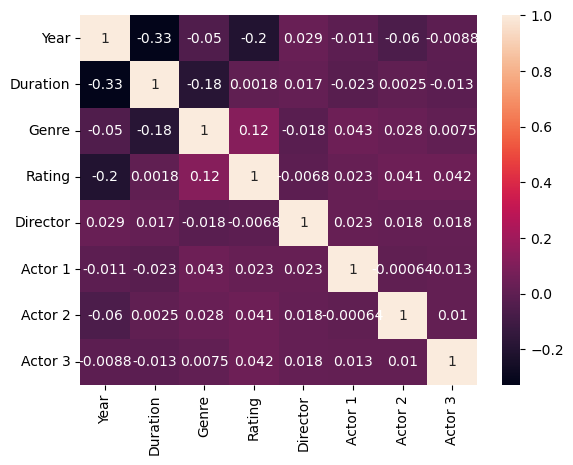

In [40]:
# dict(zip(encoder.classes_, range(len(encoder.classes_))))
sns.heatmap(new_df.corr(numeric_only=True),annot=True)

In [41]:
new_df.corr(numeric_only=True)["Rating"].apply(lambda x:abs(x)).sort_values(ascending=False)

Rating      1.000000
Year        0.204642
Genre       0.121796
Actor 3     0.042413
Actor 2     0.041353
Actor 1     0.023430
Director    0.006824
Duration    0.001839
Name: Rating, dtype: float64

In [42]:
# !jupyter nbconvert --to script encode.ipynb
new_df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [43]:
features = new_df.drop(['Rating','Name','Duration','Votes','Director'],axis=1)

In [44]:
features

,Year,Genre,Actor 1,Actor 2,Actor 3
1,2019,229,1352,2272,319
3,2019,184,1198,719,2148
5,1997,157,378,75,2045
6,2005,289,692,1112,2524
8,2012,320,1934,1175,1013
...,...,...,...,...,...
15493,2015,229,1861,1801,1615
15494,2001,133,763,1619,1184
15503,1989,28,406,754,1685
15505,1999,38,112,2164,314


In [45]:
target = new_df['Rating']

In [46]:
target

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: Float64

In [47]:
lr_model = LinearRegression()
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

In [48]:
X_train, X_test, y_train, y_test =train_test_split(features,target,test_size=0.2,random_state=42)

In [49]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [50]:
lr_model.score(X_test,y_test)

0.0550671427114201

In [51]:
tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [52]:
tree_model.score(X_test,y_test)

-0.7603692913904316

In [53]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()

In [54]:
model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [55]:
model_rf.score(X_test,y_test)

0.0856944470847788

## Trying by taking average

In [56]:
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))


Genre_Average_Rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Average_Rating'] =Genre_Average_Rating
Director_Average_Rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_Average_Rating'] =Director_Average_Rating
Actor1_Average_Rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_Average_Rating'] =Actor1_Average_Rating
Actor2_Average_Rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_Average_Rating'] =Actor2_Average_Rating
Actor3_Average_Rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_Average_Rating'] =Actor3_Average_Rating
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.415521,7.0,6.85,7.0,7.0
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.716822,4.4,5.42,4.4,4.45
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.242222,5.313333,4.788889,5.786667,5.872727
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.82,7.383333,5.435,6.933333,6.5
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.477778,5.6,5.6,5.883333,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.415521,6.1,6.725,6.1,5.85
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.95,7.25,4.157143,5.823077,5.954545
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.743465,6.27,6.307692,5.8,6.05
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.516505,5.225,5.481707,4.64,5.7375


In [57]:
from sklearn.model_selection import train_test_split
x= df[['Year','Votes','Duration','Genre_Average_Rating','Director_Average_Rating','Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']]
y=df['Rating']

In [58]:
x

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,2019,8,109,6.415521,7.0,6.85,7.0,7.0
3,2019,35,110,5.716822,4.4,5.42,4.4,4.45
5,1997,827,147,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,1086,142,6.82,7.383333,5.435,6.933333,6.5
8,2012,326,82,5.477778,5.6,5.6,5.883333,5.6
...,...,...,...,...,...,...,...,...
15493,2015,408,115,6.415521,6.1,6.725,6.1,5.85
15494,2001,1496,153,6.95,7.25,4.157143,5.823077,5.954545
15503,1989,44,125,5.743465,6.27,6.307692,5.8,6.05
15505,1999,655,129,5.516505,5.225,5.481707,4.64,5.7375


In [59]:
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: Float64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=20,random_state=42)
Linear_model = LinearRegression()

In [61]:
Linear_model.fit(X_train,y_train)

LinearRegression()

In [62]:
Linear_model.score(X_test,y_test)

0.6002407890961061

In [63]:
randomf_model = RandomForestRegressor()

In [64]:
randomf_model.fit(X_train,y_train)

RandomForestRegressor()

In [65]:
score = randomf_model.score(X_test,y_test)

In [66]:
print(f"Here random forest works best with the score of {score*100}")

Here random forest works best with the score of 70.54872011928235


## predicting 

In [73]:
data = {'Year': [2020], 'Votes': [10] ,'Duration': [150], 'Genre_Average_Rating':[7],'Director_Average_Rating':[7],'Actor1_Average_Rating':[5.5],'Actor2_Average_Rating':[5.8],'Actor3_Average_Rating':[5.3]}
trail_data = pd.DataFrame(data)
trail_data

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
0,2020,10,150,7,7,5.5,5.8,5.3


In [74]:
predict_rating = randomf_model.predict(trail_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  6.032000000000004


## saving model

In [76]:
with open('IMDB.pkl','wb') as file:
    pickle.dump(randomf_model,file)

In [77]:
# Loading the saved model using pickle
with open('IMDB.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [79]:
loaded_model.predict(trail_data)

array([6.032])

In [80]:
#Thank YOU